# Store Sales -- Time Series Forecasting

## overview

This is a time series forecasting problem. In this project, we are to predict store sales on data from Corporation Favorita, a large Ecuadorian-based grocery retailer.

### Business understanding

This projects aims to build an effective model to predict the unit price of the items in the store for different products 

### Feature understanding

- store_nbr identifies the store at which the products are sold.

- family identifies the type of product sold.

- sales gives the total sales for a product family at a particular store at a given date. Fractional values are possible since products can be sold in fractional units (1.5 kg of cheese, for instance, as opposed to 1 bag of chips).

- onpromotion gives the total number of items in a product family that were being promoted at a store at a given date

### Data understanding

1. Data importation

In [2]:
# Data manipulation packages
import pandas as pd
import numpy as np

#Data Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.colors as colors
from plotly.subplots import make_subplots


# Machine learning Packages
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.preprocessing import OneHotEncoder , LabelEncoder , OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn import set_config
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import pearsonr

# Database connection package
import pyodbc

from dotenv import dotenv_values

# Ignore warnings (optional)
import warnings
warnings.filterwarnings("ignore")


In [5]:
# Loading environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Getting the values for the credentials set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")


connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"
conn = pyodbc.connect(connection_string)

**2.2 Loading of Dataset:**
   Load the data from the SQL Server database and OneDrive.

In [6]:
query= "select * from dbo.oil"

In [2]:
table1 = pd.read_sql_query(query,conn)
table1

NameError: name 'query' is not defined

In [9]:
query2= "select * from dbo.holidays_events"

In [10]:
table2 = pd.read_sql_query(query2,conn)
table2

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [12]:
query3= "select * from dbo.stores"

In [13]:
table3 = pd.read_sql_query(query3,conn)
table3

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [3]:
oil = pd.read_csv('table1.csv',parse_dates =['date'])
oil

,Unnamed: 0,date,dcoilwtico
0,0,2013-01-01,NaN
1,1,2013-01-02,93.139999
2,2,2013-01-03,92.970001
3,3,2013-01-04,93.120003
4,4,2013-01-07,93.199997
...,...,...,...
1213,1213,2017-08-25,47.650002
1214,1214,2017-08-28,46.400002
1215,1215,2017-08-29,46.459999
1216,1216,2017-08-30,45.959999


In [4]:
# checking the date range of the data
print(f"Date range is from:{oil['date'].min()} to {oil['date'].max()}")

Date range is from:2013-01-01 00:00:00 to 2017-08-31 00:00:00


In [ ]:
df['Order date']= pd.to_datetime(df['orderdate']).dt.to_period('m')

In [5]:
oil.isna().sum()

Unnamed: 0     0
date           0
dcoilwtico    43
dtype: int64

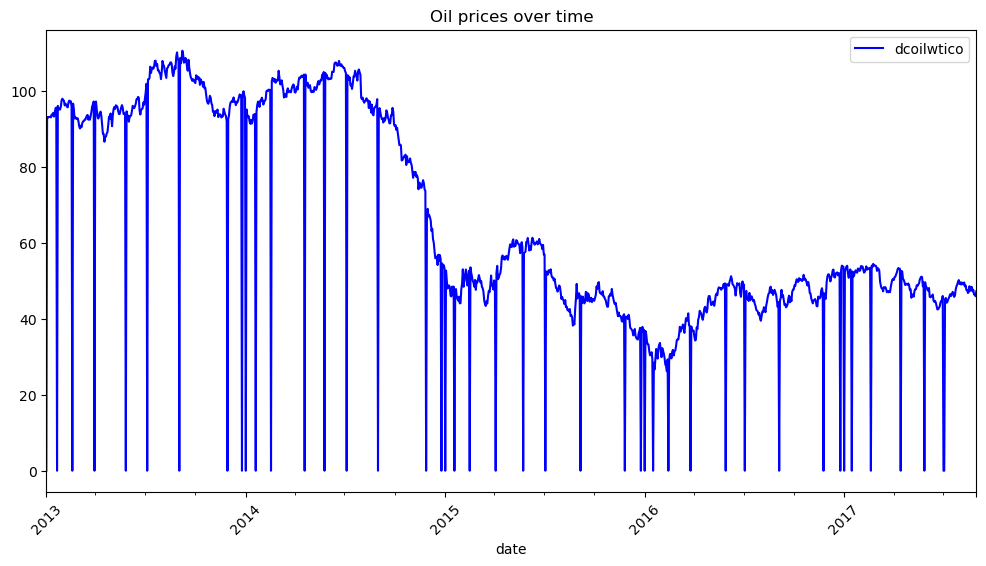

In [33]:
ax = oil.groupby(['date'], as_index=False)["dcoilwtico"].sum().plot(
    "date", "dcoilwtico", figsize=(12,6), title="Oil prices over time", color='blue')

plt.tick_params(axis='x', labelrotation=45)

In [6]:
holiday = pd.read_csv('table2.csv',parse_dates =['date'])
holiday

,Unnamed: 0,date,type,locale,locale_name,description,transferred
0,0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...,...
345,345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [7]:
print(f"Date range is from:{holiday['date'].min()} to {holiday['date'].max()}")

Date range is from:2012-03-02 00:00:00 to 2017-12-26 00:00:00


In [14]:
holiday.isna().sum()

Unnamed: 0     0
date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

In [8]:
stores = pd.read_csv('table3.csv')
stores.head(10)

,Unnamed: 0,store_nbr,city,state,type,cluster
0,0,1,Quito,Pichincha,D,13
1,1,2,Quito,Pichincha,D,13
2,2,3,Quito,Pichincha,D,8
3,3,4,Quito,Pichincha,D,9
4,4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,5,6,Quito,Pichincha,D,13
6,6,7,Quito,Pichincha,D,8
7,7,8,Quito,Pichincha,D,8
8,8,9,Quito,Pichincha,B,6
9,9,10,Quito,Pichincha,C,15


In [15]:
stores.shape

(54, 6)

In [10]:
stores.isna().sum()

Unnamed: 0    0
store_nbr     0
city          0
state         0
type          0
cluster       0
dtype: int64

In [26]:
df = pd.read_csv(r'/Users/grakashi/Downloads/train.csv',parse_dates =['date'])
df.head(20)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0
5,5,2013-01-01,1,BREAD/BAKERY,0.0,0
6,6,2013-01-01,1,CELEBRATION,0.0,0
7,7,2013-01-01,1,CLEANING,0.0,0
8,8,2013-01-01,1,DAIRY,0.0,0
9,9,2013-01-01,1,DELI,0.0,0


In [16]:
df.shape

(3000888, 6)

In [12]:
print(f"Date range is from:{df['date'].min()} to {df['date'].max()}")

Date range is from:2013-01-01 00:00:00 to 2017-08-15 00:00:00


In [13]:
transaction = pd.read_csv('transactions.csv',parse_dates =['date'])
transaction

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


In [14]:
print(f"Date range is from:{transaction['date'].min()} to {transaction['date'].max()}")

Date range is from:2013-01-01 00:00:00 to 2017-08-15 00:00:00


### Merging

In [17]:
# combine stores with training dataset

df_train = pd.merge(df,stores,on='store_nbr')
df_train

,id,date,store_nbr,family,sales,onpromotion,Unnamed: 0,city,state,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,0,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.000,0,0,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.000,0,0,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.000,0,0,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.000,0,0,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,8,Quito,Pichincha,B,6
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,8,Quito,Pichincha,B,6
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,8,Quito,Pichincha,B,6
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,8,Quito,Pichincha,B,6


In [23]:
df_train.drop(['Unnamed: 0'], axis=1, inplace=True)

AttributeError: 'NoneType' object has no attribute 'drop'

In [25]:
df_train

### 2 Exploratory data analysis

- Explore data (info, duplicated, null values, describe)

In [11]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB


In [12]:
transaction.isna().sum()

date            0
store_nbr       0
transactions    0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [7]:
# checking for missing data in the training data

df.isna().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [21]:
# checking for duplicated data
df.duplicated().sum()

0

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3000888.0,1.500444e+06,866281.891642,0.0,750221.75,1500443.5,2.250665e+06,3000887.0
store_nbr,3000888.0,2.750000e+01,15.585787,1.0,14.00,27.5,4.100000e+01,54.0
sales,3000888.0,3.577757e+02,1101.997721,0.0,0.00,11.0,1.958473e+02,124717.0
onpromotion,3000888.0,2.602770e+00,12.218882,0.0,0.00,0.0,0.000000e+00,741.0


In [31]:
df.set_index('date', inplace=True)

In [32]:
df['year']= df.index.year
df['month'] = df.index.month
df['day'] = df.index.day

df.sample(5,random_state=0)

,id,store_nbr,family,sales,onpromotion,year,month,day
date,,,,,,,,
2014-02-28,752075,11,BREAD/BAKERY,450.0,0,2014,2,28
2016-11-16,2517272,39,SEAFOOD,8.0,1,2016,11,16
2016-11-29,2540112,30,BEVERAGES,1422.0,40,2016,11,29
2016-08-31,2379367,20,BABY CARE,1.0,0,2016,8,31
2014-01-30,700715,2,PET SUPPLIES,8.0,0,2014,1,30


In [11]:
df.loc['2016-08-10']

,id,store_nbr,family,sales,onpromotion,year,month,day
date,,,,,,,,
2016-08-10,2341548,1,AUTOMOTIVE,4.000,0,2016,8,10
2016-08-10,2341549,1,BABY CARE,0.000,0,2016,8,10
2016-08-10,2341550,1,BEAUTY,4.000,0,2016,8,10
2016-08-10,2341551,1,BEVERAGES,2135.000,25,2016,8,10
2016-08-10,2341552,1,BOOKS,0.000,0,2016,8,10
...,...,...,...,...,...,...,...,...
2016-08-10,2343325,9,POULTRY,289.260,0,2016,8,10
2016-08-10,2343326,9,PREPARED FOODS,66.315,12,2016,8,10
2016-08-10,2343327,9,PRODUCE,1143.141,1,2016,8,10


In [12]:
df.loc['2016-07']

,id,store_nbr,family,sales,onpromotion,year,month,day
date,,,,,,,,
2016-07-01,2270268,1,AUTOMOTIVE,8.000,1,2016,7,1
2016-07-01,2270269,1,BABY CARE,0.000,0,2016,7,1
2016-07-01,2270270,1,BEAUTY,5.000,1,2016,7,1
2016-07-01,2270271,1,BEVERAGES,2298.000,8,2016,7,1
2016-07-01,2270272,1,BOOKS,0.000,0,2016,7,1
...,...,...,...,...,...,...,...,...
2016-07-31,2325505,9,POULTRY,686.798,1,2016,7,31
2016-07-31,2325506,9,PREPARED FOODS,119.438,1,2016,7,31
2016-07-31,2325507,9,PRODUCE,2252.286,3,2016,7,31


<Axes: xlabel='date'>

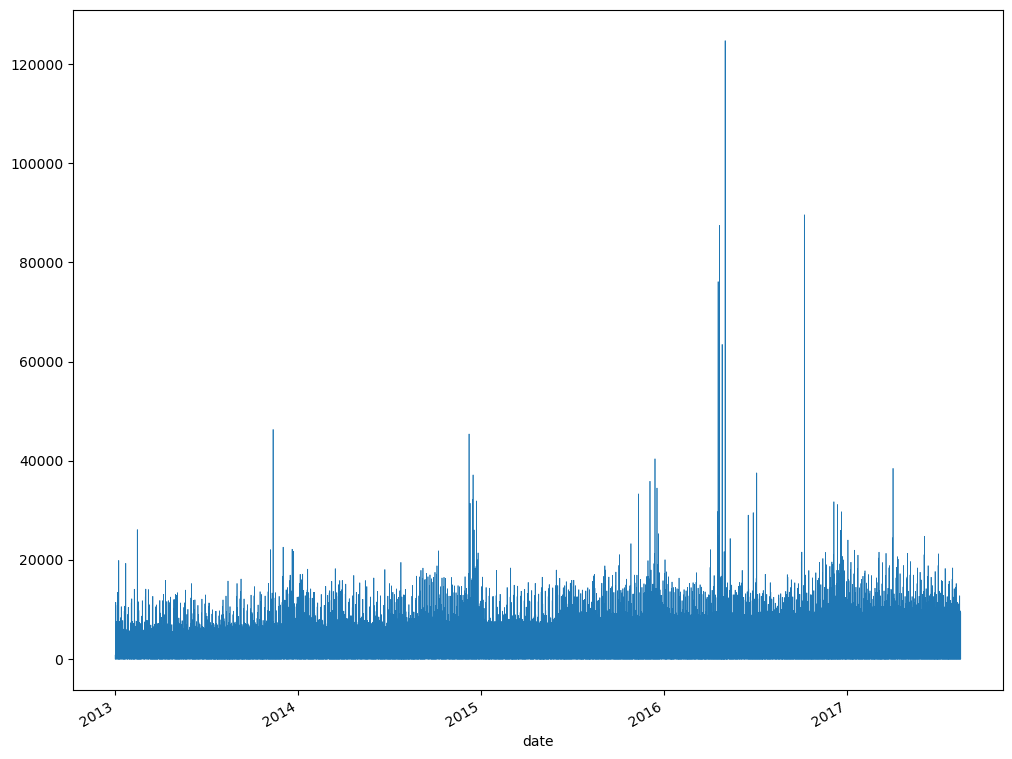

In [14]:
plt.figure(figsize=(12,10))
df['sales'].plot(linewidth = 0.5)

<Figure size 1200x1000 with 0 Axes>

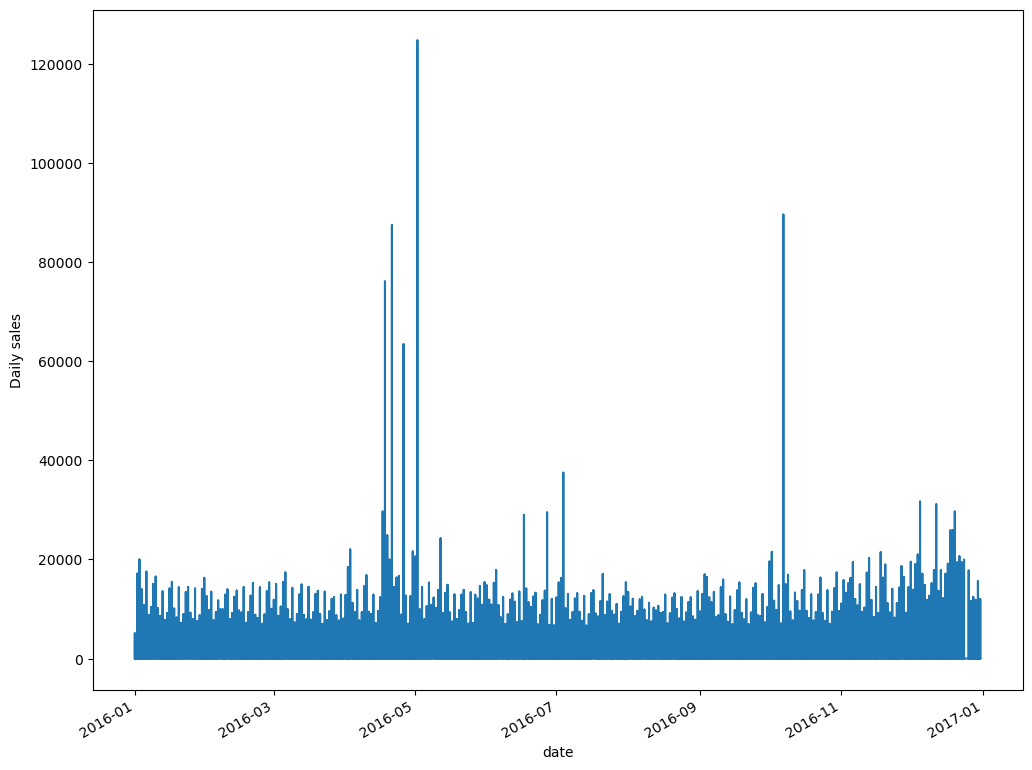

<Figure size 1200x1000 with 0 Axes>

In [15]:
plt.figure(figsize=(12,10))
ax =df.loc['2016','sales'].plot()
ax.set_ylabel('Daily sales');
plt.figure(figsize=(12,10))

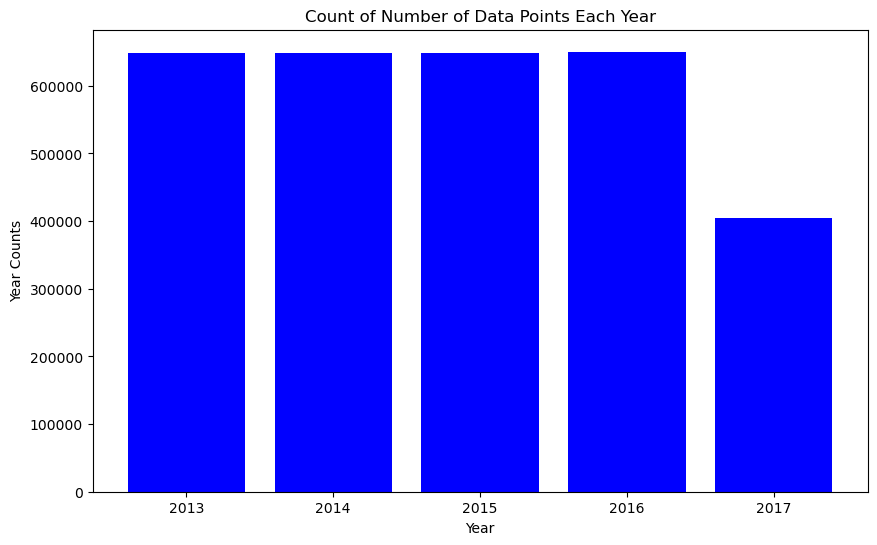

In [16]:

# Grouping by year and count the data points
year_data = df.groupby('year').size().reset_index(name='counts')

# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(year_data['year'], year_data['counts'], color='blue')
ax.set_xticks(year_data['year'])
ax.set_title('Count of Number of Data Points Each Year')
ax.set_xlabel('Year')
ax.set_ylabel('Year Counts')

plt.show()

sales per store

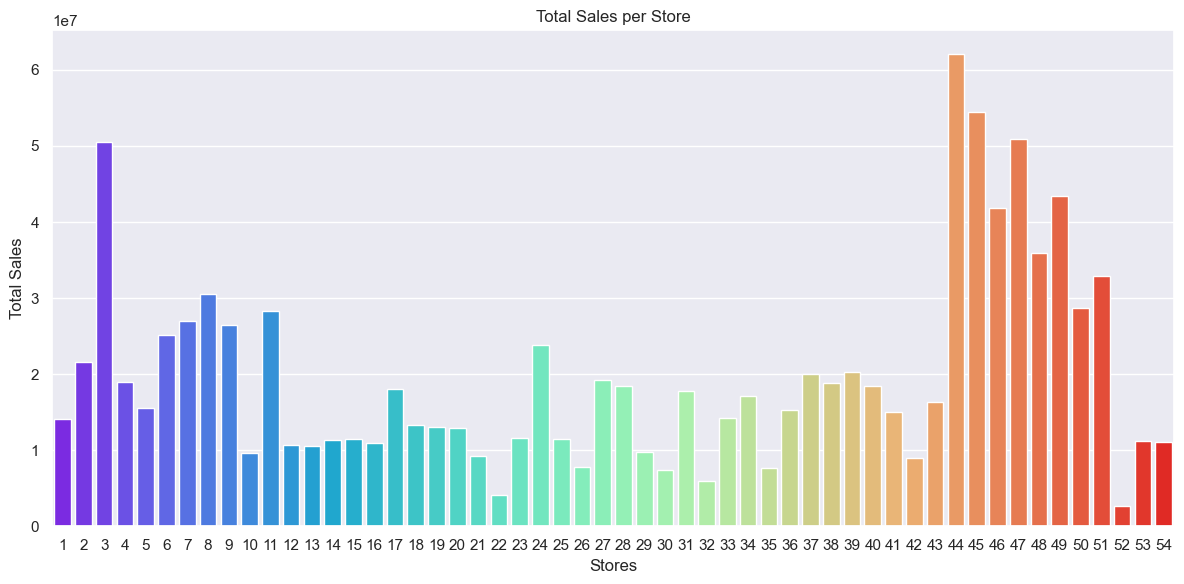

In [17]:
# Filter rows where unit_sales > 0
df = df[df['sales'] > 0]

# Group by 'store_nbr' and calculate the sum of 'unit_sales'
store_unit_sales = df.groupby('store_nbr')['sales'].sum().reset_index()

# Set the figure size
sns.set(rc={'figure.figsize': (12, 6)})

# Create a barplot
sns.barplot(x='store_nbr', y='sales', data=store_unit_sales, palette='rainbow')

# Set titles and labels
plt.title('Total Sales per Store')
plt.xlabel('Stores')
plt.ylabel('Total Sales')

# Show the plot
plt.tight_layout()
plt.show()

In [19]:
# Filter rows where unit_sales > 0
df = df[df['sales'] > 0]

# Group by 'date' and calculate the sum of 'sales'
sales_date_agg = df.groupby('date')['sales'].sum().reset_index()

# Create a lineplot using Plotly Express
fig = px.line(sales_date_agg, x='date', y='sales', title='Plot of Total Sales Over Time (Daily)')
fig.update_layout(width=1200, height=600)

# Add a range slider
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
# Show the plot
fig.show()

**2.3.1 Univariate Analysis:**
     Explore individual variables for insights.

Univariate Analysis

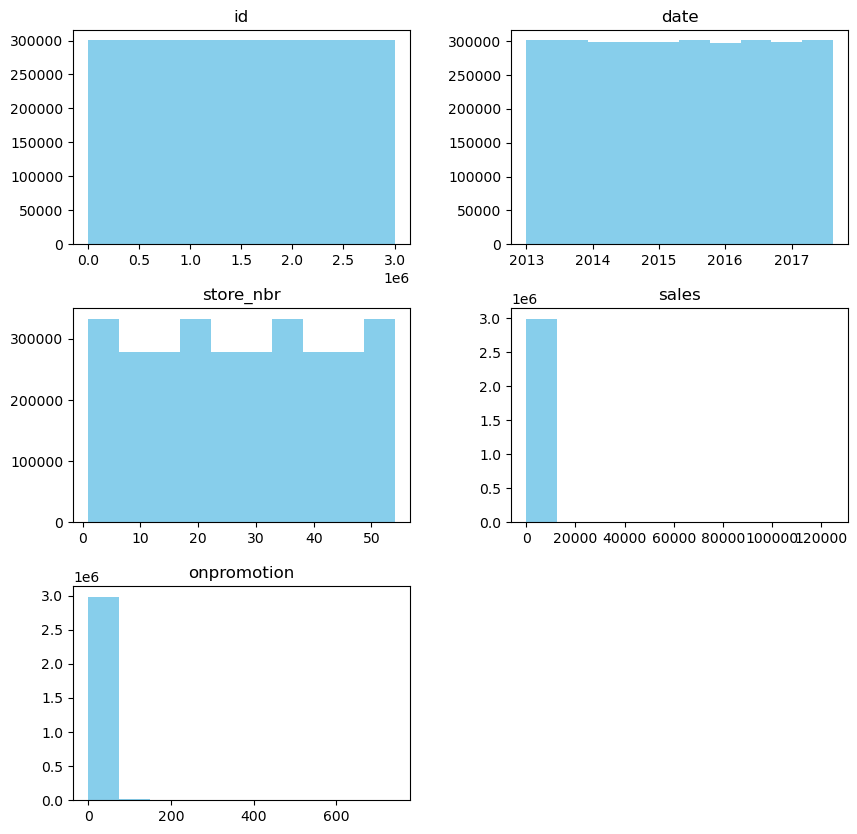

In [17]:
df.hist(figsize=(10,10),grid=False,color = 'skyblue')
plt.show()

### Further Observation using KDE and box plot

<Axes: ylabel='Density'>

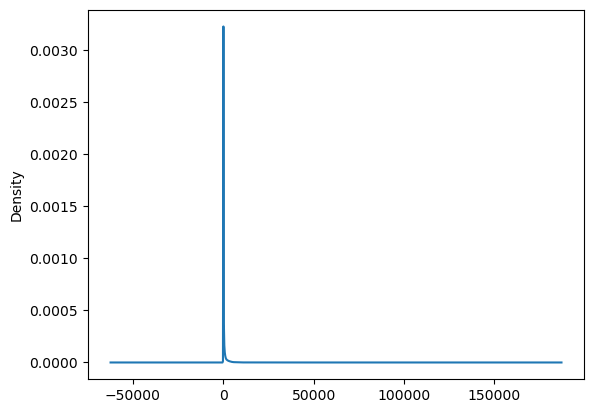

In [18]:
df['sales'].plot(kind= 'kde')

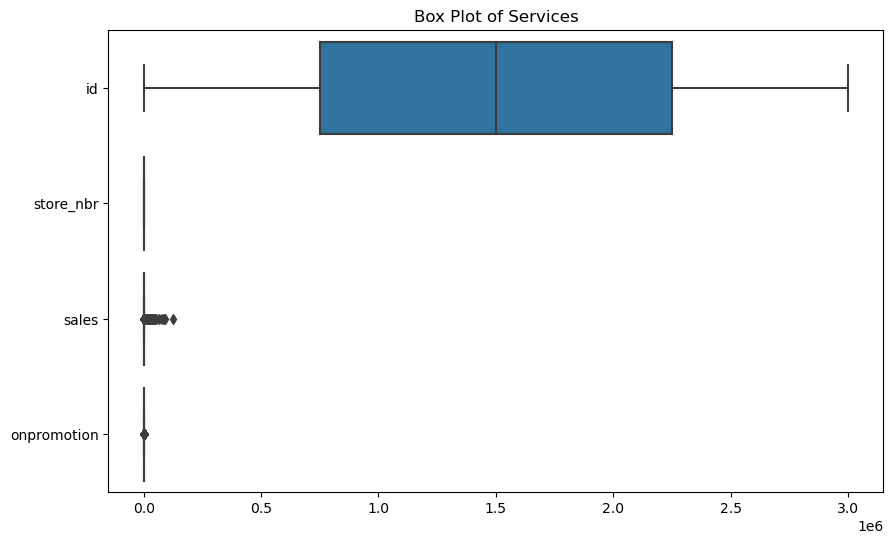

In [19]:
# Create a box plot to check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df,orient='h')
plt.title('Box Plot of Services')
plt.show()

**2.3.2 Bivariate Analysis:**
     Investigate relationships between pairs of variables.

Bivariate Analysis

In [20]:
correlation = df.corr(numeric_only=True)

correlation

,id,store_nbr,sales,onpromotion
id,1.000000,0.000301,0.085784,0.206260
store_nbr,0.000301,1.000000,0.041196,0.007286
sales,0.085784,0.041196,1.000000,0.427923
onpromotion,0.206260,0.007286,0.427923,1.000000


<Axes: >

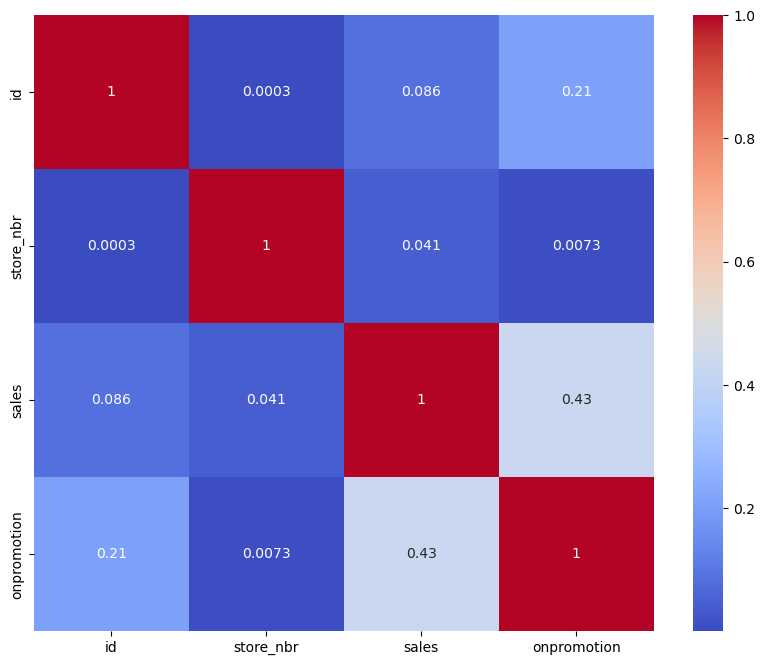

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(data = correlation,annot = True,cmap = 'coolwarm')

##### Key insights

- 
- 

**2.3.3 Multivariate Analysis:**
     Examine interactions between three or more variables.

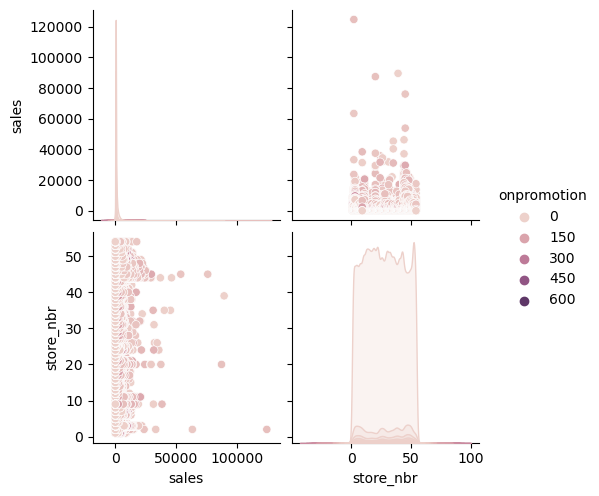

In [24]:
data = df[['sales','store_nbr','onpromotion']]

sns.pairplot(data,hue='onpromotion')

**2.4 Answering Analytical Questions:**
     Visualizations

Q1.How do different services (PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, etc.) contribute to customer churn?

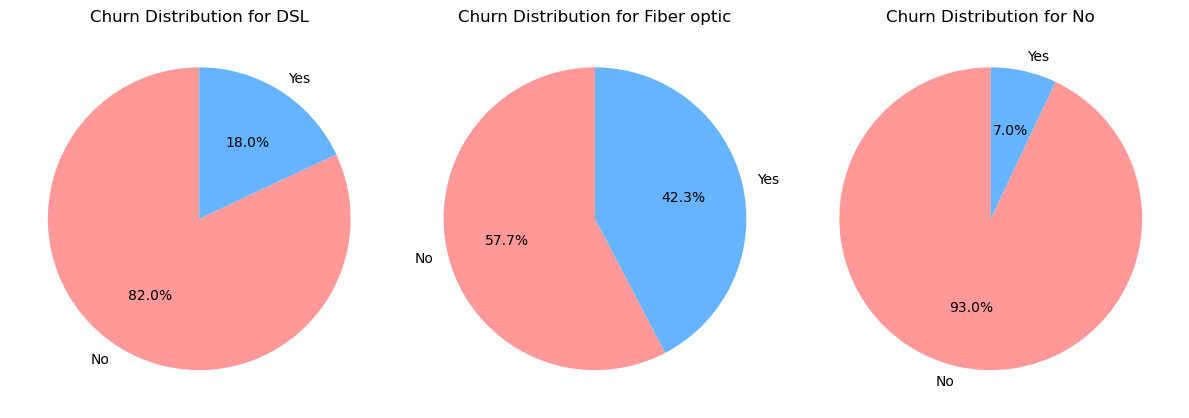

In [20]:
# Plot a pie chart for each internet service category
plt.figure(figsize=(12, 5))

for i, service_type in enumerate(churn_counts.index):
    plt.subplot(1, 3, i + 1)
    plt.pie(churn_counts.loc[service_type], labels=churn_counts.columns, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
    plt.title(f'Churn Distribution for {service_type}')

plt.tight_layout()
plt.show()

Key Insights and Recommendations
- 42% of the customers who churned had subscribed to fiber optic:
We recommend that the company to check the fiber optic connection and make sure that customer satisfaction is met

#### Q2. Which dates have the lowest and highest sales for each year?

In [34]:
max_sales = df.groupby('year')['sales'].idxmax()
result_max = df.loc[max_sales]
result_max

,id,store_nbr,family,sales,onpromotion,year,month,day
date,,,,,,,,
2013-11-12,561330,1,AUTOMOTIVE,1.000,0,2013,11,12
2013-11-12,561331,1,BABY CARE,0.000,0,2013,11,12
2013-11-12,561332,1,BEAUTY,1.000,0,2013,11,12
2013-11-12,561333,1,BEVERAGES,819.000,0,2013,11,12
2013-11-12,561334,1,BOOKS,0.000,0,2013,11,12
...,...,...,...,...,...,...,...,...
2017-04-02,2760313,9,POULTRY,621.062,0,2017,4,2
2017-04-02,2760314,9,PREPARED FOODS,229.181,0,2017,4,2
2017-04-02,2760315,9,PRODUCE,2303.476,4,2017,4,2


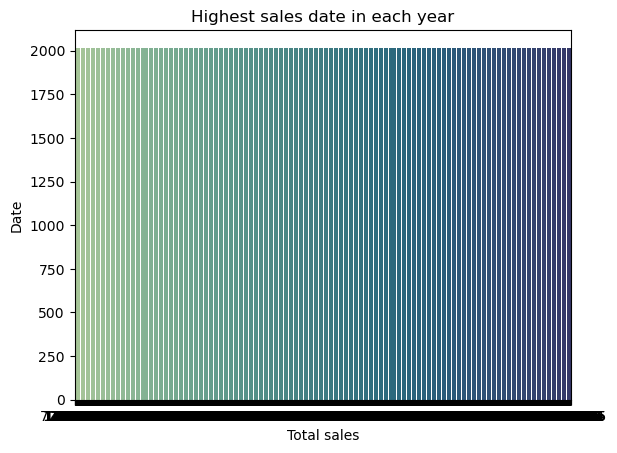

In [38]:
result_max_sorted = result_max.sort_values(by='sales', ascending=False)

# Creating the bar plot
sns.barplot(data=result_max_sorted, y="year", x="sales", palette='crest')
plt.ylabel("Date")
plt.xlabel("Total sales")
plt.title("Highest sales date in each year")
plt.show()

Q4. Is there a correlation between monthly charges (MonthlyCharges), total charges (TotalCharges), and customer churn?

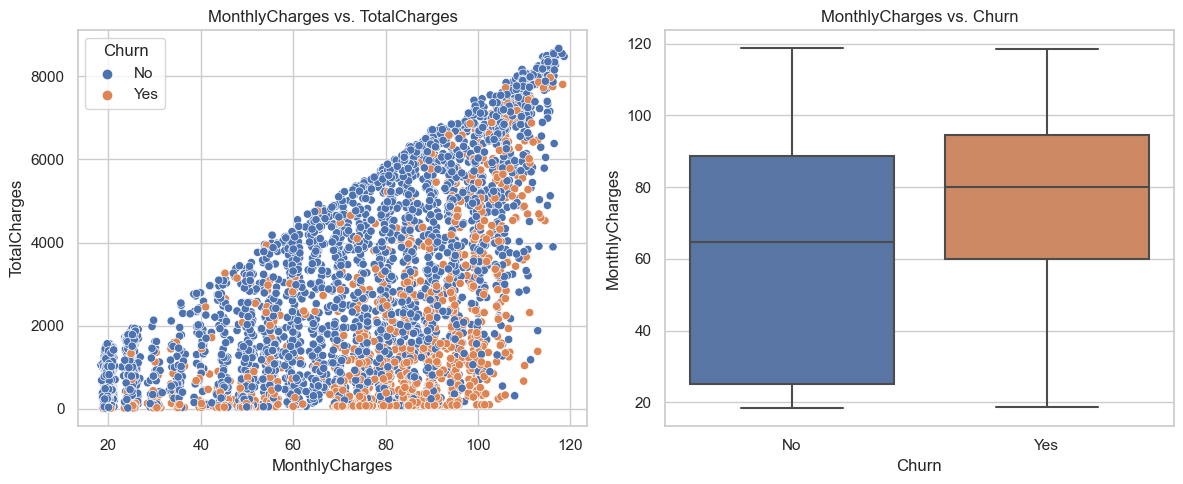

In [23]:
sns.set(style="whitegrid")

# Scatter plot for MonthlyCharges vs. TotalCharges
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='Churn', data=df)
plt.title('MonthlyCharges vs. TotalCharges')

# Box plot for MonthlyCharges vs. Churn
plt.subplot(1, 2, 2)
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('MonthlyCharges vs. Churn')

# Adjust layout
plt.tight_layout()
plt.show()

Key Insights:
- The monthly charges seem to have a correlation with the totalcharges , they seem to have a positive correlation with churn rate

Q5. Is there a relationship between gender and the churn rate?

In [24]:
df.groupby('gender')['Churn'].value_counts()

gender  Churn
Female  No       1823
        Yes       661
Male    No       1883
        Yes       675
Name: Churn, dtype: int64

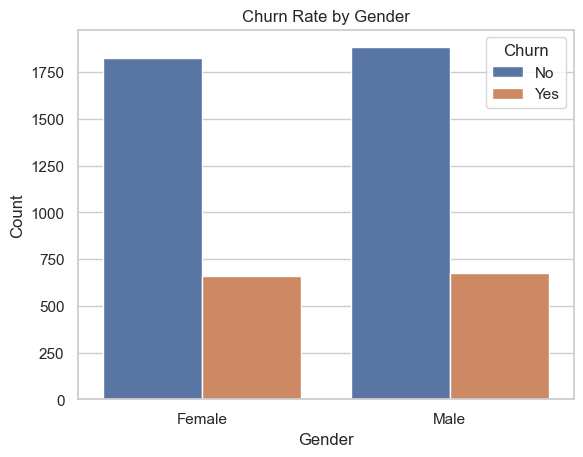

In [25]:
sns.countplot(x='gender', hue='Churn', data=df)

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Churn Rate by Gender')

# Show the plot
plt.show()

Q6. How does internet service affect churn rate?

Text(0, 0.5, 'Count')

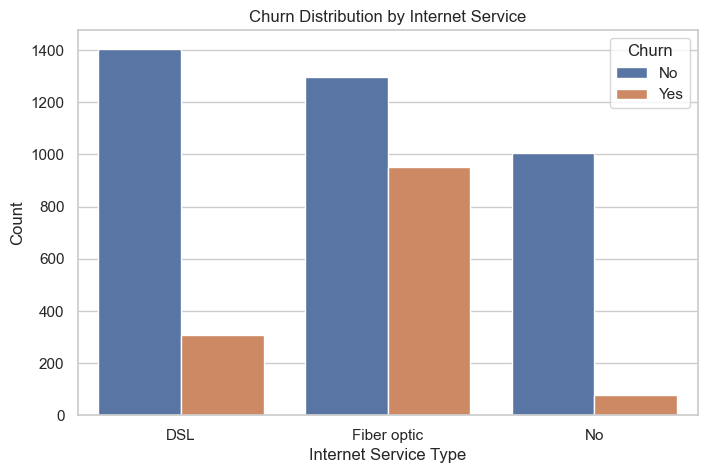

In [26]:
sns.set(style="whitegrid")

# Count plot for Churn based on InternetService
plt.figure(figsize=(8, 5))
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Churn Distribution by Internet Service')
plt.xlabel('Internet Service Type')
plt.ylabel('Count')

Q7.Are senior citizens more likely to churn

Text(0, 0.5, 'Count')

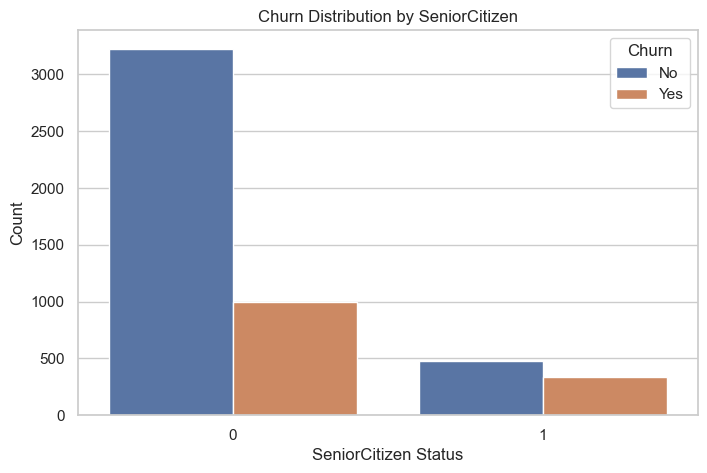

In [27]:
sns.set(style="whitegrid")

# Count plot for Churn based on SeniorCitizen status
plt.figure(figsize=(8, 5))
sns.countplot(x='SeniorCitizen', hue='Churn', data=df)
plt.title('Churn Distribution by SeniorCitizen')
plt.xlabel('SeniorCitizen Status')
plt.ylabel('Count')

Q8. What is the churn rate in percentage?

In [28]:
# calculating the no of churned customers
churned_customers = df[df['Churn']=='Yes'].shape[0]

churned_customers

1336

In [29]:
# overall customers
total_customers = df.shape[0]

total_customers

5043

In [30]:
churn_rate = (churned_customers/total_customers) * 100

print('Overall churn rate is {:.2f}%'.format (churn_rate))

Overall churn rate is 26.49%


**2.5  Hypothesis Testing**
     

In [ ]:
# Replace 'TotalCharges' and 'Churn' with actual column names
total_charges = df['TotalCharges']
churn = df['Churn']

# Plot a scatter plot to visualize the relationship
sns.scatterplot(x=total_charges, y=churn)
plt.title('Scatter Plot of Total Charges vs. Churn')
plt.xlabel('Total Charges')
plt.ylabel('Churn')
plt.show()

# Calculate the Pearson correlation coefficient and p-value
correlation, p_value = pearsonr(total_charges, churn)

# Output the correlation coefficient and p-value
print(f"Pearson Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant relationship between Total Charges and Churn.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between Total Charges and Churn.")

**2.6 Insights and Recommendations:**
     

## 3.0 Data Preparation

### Data Cleaning- removing duplicates, handling missing values

In [31]:
# remove customerID column as it won't be relevant
df = df.drop('customerID',axis=1)

In [32]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        8
Churn               1
dtype: int64

Handling the missing values using simple imputer

In [33]:
# Using the simple imputer(mean) to impute for missing values in the Totalcharges column
imputer = SimpleImputer(strategy='mean')  

# Fit and transform the imputer on the 'TotalCharges' column
df['TotalCharges'] = imputer.fit_transform(df[['TotalCharges']])

In [34]:
# Using the simple imputer(mode) to impute for missing values in the churn column
imputer = SimpleImputer(strategy='most_frequent')  

# Fit and transform the imputer on the 'churn' column
df['Churn'] = imputer.fit_transform(df[['Churn']])

#### 3.1 Split data into input(X) and target(y) features

In [35]:
X = df.drop('Churn', axis=1)
y = df['Churn']

#### 3.2 Splitting data into training and evaluation

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42,stratify=y)

#### 3.3 Feature Engineering

In [41]:
numeric_cols = X.select_dtypes(include='number').columns

numeric_cols

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [42]:
categorical_cols = X.select_dtypes(include='object').columns

categorical_cols

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

#### 3.4 Pipeline

In [43]:
# creating a pipeline
numeric_pipeline = Pipeline(steps=[
    ('num_imputer',SimpleImputer(strategy='mean')),
    ('scaler ',RobustScaler()),
])

categorical_pipeline = Pipeline(steps=[
    ('cat_imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder()),
])

Preprocessor =ColumnTransformer([
    ('numerical_transformations',numeric_pipeline,numeric_cols),
    ('cat_transformations',categorical_pipeline,categorical_cols)

])

#### Label Encoding

In [44]:
LabelEncoder = LabelEncoder()
y_train_encoded = LabelEncoder.fit_transform(y_train)
y_test_encoded = LabelEncoder.transform(y_test)

#### ML Pipeline

In [45]:
decision_tree_classifier = DecisionTreeClassifier(random_state = 7)
decision_tree_pipeline = Pipeline([
    ('preprocessor',Preprocessor),
    ('classifier',decision_tree_classifier)
])

Pass Data through the Pipeline

In [46]:
decision_tree_pipeline.fit(X_train,y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_transformations',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler ',
                                                                   RobustScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat_transformations',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier', DecisionTreeClassifier(random_state=7))])

Evaluating the trained model

In [47]:
# predicting the X_test values
pred = decision_tree_pipeline.predict(X_test)
pred

array([0, 0, 0, ..., 1, 0, 1])

In [48]:
# checking for the accuracy score
accuracy = accuracy_score(y_test_encoded, pred)

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.72


In [49]:
# Printing the classification report
print(classification_report(y_test_encoded, pred))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       742
           1       0.48      0.54      0.51       267

    accuracy                           0.72      1009
   macro avg       0.65      0.67      0.66      1009
weighted avg       0.73      0.72      0.73      1009



Random forest model

In [50]:
# creating a random forest instance and passing it to the pipeline
random_forest = RandomForestClassifier()
ran_pipeline = Pipeline([
('preprocessor',Preprocessor),
    ('classifier',random_forest)
    ])

ran_pipeline.fit(X_train,y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_transformations',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler ',
                                                                   RobustScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat_transformations',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier())])

Evaluating the trained model

In [51]:
# predicting the X_test values
predict = ran_pipeline.predict(X_test)
predict

array([0, 0, 0, ..., 1, 0, 0])

In [52]:
# checking the accuracy of the model
accuracy = accuracy_score(y_test_encoded, predict)

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.79


In [53]:
# printing classification report
print(classification_report(y_test_encoded, predict))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       742
           1       0.62      0.50      0.55       267

    accuracy                           0.79      1009
   macro avg       0.73      0.70      0.71      1009
weighted avg       0.78      0.79      0.78      1009



Support Vector Machine Model

In [54]:
# creating a support vector machine instance and passing it the pipeline
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_pipeline = Pipeline([
('preprocessor',Preprocessor),
    ('classifier',svm)
    ])

svm_pipeline.fit(X_train,y_train_encoded)
    

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_transformations',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler ',
                                                                   RobustScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat_transformations',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier', SVC(random_state=42))])

Evaluating the trained model

In [55]:
# predicting the X_test values
s_predict = svm_pipeline.predict(X_test)
s_predict

array([0, 0, 0, ..., 1, 0, 0])

In [56]:
# checking the accuracy
accuracy = accuracy_score(y_test_encoded, s_predict)

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.80


In [57]:
# printing classification report
print(classification_report(y_test_encoded, s_predict))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       742
           1       0.65      0.55      0.60       267

    accuracy                           0.80      1009
   macro avg       0.75      0.72      0.73      1009
weighted avg       0.80      0.80      0.80      1009



Naives Bayes Classifier Model

In [58]:
# creating a naives bayes instance and passing it the pipeline
naives_bayes = GaussianNB()
naives_pipeline = Pipeline(steps=[
    ('preprocessor',Preprocessor),
    ('model',naives_bayes)
])

naives_pipeline.fit(X_train,y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_transformations',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler ',
                                                                   RobustScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat_transformations',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('model', GaussianNB())])

Evaluating the trained model

In [59]:
# predicting the X_test values
n_predict = naives_pipeline.predict(X_test)
n_predict

array([1, 1, 0, ..., 1, 1, 0])

In [60]:
# checking the accuracy
accuracy = accuracy_score(y_test_encoded, n_predict)

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.64


In [61]:
# printing the classification report
print(classification_report(y_test_encoded, n_predict))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       742
           1       0.65      0.55      0.60       267

    accuracy                           0.80      1009
   macro avg       0.75      0.72      0.73      1009
weighted avg       0.80      0.80      0.80      1009



Gradient Boosting Classifier Model

In [62]:
# creating a gradient boost instance and passing it the pipeline
gradient_boost = GradientBoostingClassifier()
gran_pipeline = Pipeline([
('preprocessor',Preprocessor),
    ('classifier',gradient_boost)
    ])

gran_pipeline.fit(X_train,y_train_encoded)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_transformations',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler ',
                                                                   RobustScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat_transformations',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier', GradientBoostingClassifier())])

Evaluating the trained model

In [63]:
# predicting the values in the X_test
g_predict = gran_pipeline.predict(X_test)
g_predict

array([0, 0, 0, ..., 1, 0, 0])

In [64]:
# checking the accuracy score of the model
accuracy = accuracy_score(y_test_encoded, g_predict)

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.80


In [65]:
# printing the classification report
print(classification_report(y_test_encoded, g_predict))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       742
           1       0.64      0.56      0.60       267

    accuracy                           0.80      1009
   macro avg       0.75      0.72      0.73      1009
weighted avg       0.79      0.80      0.80      1009



Comparison of the models

According to the accuracy score we can see that the best model is GradientBoostingClassifier or Support Vector Machine Model with an accuracy score of 80%